<a href="https://colab.research.google.com/github/oshvil2020/Football-Match-Prediction/blob/main/FootballMatchPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework/Football/train.csv",encoding='latin-1')
sample_sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework/Football/sample_submission.csv",encoding='latin-1')
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework/Football/test.csv",encoding='latin-1')
train_target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Homework/Football/train_target_and_scores.csv',encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Descriptive columns

> * target - The variable you have to predict the probabilities only available in the train set.
> * home_team_name - The name of the Home the team.
> * away_team_name - The name of the Away the team.
> * match_date - The match date (UTC).
> * league_name - The league name.
> * league_id - The league id. Note that league names can be identical for two differents id.
> * is_cup - If the value is 1 the match is played for a cup compettion.
> * home_team_coach_id - The id of the Home team coach.
> * away_team_coach_id - The id of the Away team coach.


Historical home team features

> * home_team_history_matchdate{i} - The date of the last i-th match played by Home team.
> * home_team_history_is_playhome{i} - If 1, the Home team played home.
> * home_team_history_iscup{i} - If 1, the match was a cup competition.
>* home_team_historygoal{i} - The number of goals scored by the Home team on its last i-th match.
>* home_team_history_opponentgoal{i} - The number of goals conceded by the Home team on its last i-th match.
>* home_team_historyrating{i} - The rating of the Home team on its last i-th match (pre match rating).
home_team_history_opponentrating{i} - The rating of the opponent team on Home team last i-th match (pre match rating).
home_team_historycoach{i} - The coach id of the Home team on its last i-th match.
home_team_history_leagueid{i} - The league name id by the Home team on its last i-th match.


Historical away team features

> * away_team_history_matchdate{i} - The date of the last i-th match played by Away team.
>* away_team_history_is_playhome{i} - If 1, the Away team played home.
>* away_team_history_iscup{i} - If 1, the match was a cup competition.
>* away_team_historygoal{i} - The number of goals scored by the Away team on its last i-th match.
>* away_team_history_opponentgoal{i} - The number of goals conceded by the Away team on its last i-th match.
>* away_team_historyrating{i} - The rating of the Away team on its last i-th match (pre match rating).
>* away_team_history_opponentrating{i} - The rating of the opponent team on Away team last i-th match (pre match rating).
>* away_team_historycoach{i} - The coach id of the Away team on its last i-th match.
>* away_team_history_leagueid{i} - The league name id played by the Away on its last i-th match.

In [ ]:
for i in df_train.columns:
  print(i)

id
target
home_team_name
away_team_name
match_date
league_name
league_id
is_cup
home_team_coach_id
away_team_coach_id
home_team_history_match_date_1
home_team_history_match_date_2
home_team_history_match_date_3
home_team_history_match_date_4
home_team_history_match_date_5
home_team_history_match_date_6
home_team_history_match_date_7
home_team_history_match_date_8
home_team_history_match_date_9
home_team_history_match_date_10
home_team_history_is_play_home_1
home_team_history_is_play_home_2
home_team_history_is_play_home_3
home_team_history_is_play_home_4
home_team_history_is_play_home_5
home_team_history_is_play_home_6
home_team_history_is_play_home_7
home_team_history_is_play_home_8
home_team_history_is_play_home_9
home_team_history_is_play_home_10
home_team_history_is_cup_1
home_team_history_is_cup_2
home_team_history_is_cup_3
home_team_history_is_cup_4
home_team_history_is_cup_5
home_team_history_is_cup_6
home_team_history_is_cup_7
home_team_history_is_cup_8
home_team_history_is_cup

In [ ]:
df_train[]

In [ ]:
df_train['Year']=pd.to_datetime(df_train['match_date'], format='%Y-%m-%d').dt.year


In [ ]:
#league_name = df_train['league_name'].unique()

# df_train.query('target == "away"')
# df_train.query('league_name ')


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
3,11983471,away,LeÃ³n,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
7,11974169,away,Hamilton Wanderers,Wellington Phoenix Res,2019-12-01 01:00:00,Premiership,1055,False,5683765.0,517852.0,...,1055.0,1055.0,1055.0,1055.0,NaN,NaN,NaN,NaN,NaN,NaN
10,11983473,away,QuerÃ©taro,Necaxa,2019-12-01 03:05:00,Liga MX,743,False,896767.0,10319425.0,...,743.0,743.0,743.0,746.0,743.0,743.0,746.0,743.0,743.0,743.0
11,11906934,away,Ryutsu Keizai Dragons,Matsue City,2019-12-01 04:00:00,Japan Football League,1719,False,37252510.0,37252510.0,...,1719.0,1719.0,1719.0,1719.0,1719.0,1719.0,1719.0,1719.0,1028.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110928,17715495,away,Atibaia,Osasco Audax,2021-04-30 23:00:00,Paulista A2,1314,False,220206.0,29328388.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
110930,17715491,away,Juventus,Oeste,2021-04-30 23:00:00,Paulista A2,1314,False,529523.0,460181.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,651.0,651.0
110932,17948949,away,New York RB II,Hartford Athletic,2021-04-30 23:00:00,USL Championship,791,False,2511000.0,3645.0,...,791.0,791.0,791.0,791.0,791.0,791.0,791.0,791.0,791.0,791.0
110934,18030096,away,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,Liga De Futbol Prof,1098,False,465833.0,16488543.0,...,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0


In [ ]:
df_train

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real EstelÃ­,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,MarathÃ³n,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,LeÃ³n,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,CobÃ¡n Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,draw,Zamora FÃºtbol Club,Hermanos Colmenares,2021-04-30 23:00:00,Primera Division,800,False,7708122.0,37564088.0,...,800.0,800.0,1101.0,1101.0,803.0,803.0,803.0,803.0,803.0,803.0
110934,18030096,away,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,Liga De Futbol Prof,1098,False,465833.0,16488543.0,...,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0
110935,17715497,draw,SÃ£o Bernardo,Ãgua Santa,2021-04-30 23:00:00,Paulista A2,1314,False,8416491.0,528562.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
110936,17944153,away,Everton,La Serena,2021-05-01 00:00:00,Primera Division,663,False,6973085.0,471757.0,...,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0


In [ ]:

df_train3 = df_train.groupby('league_name').count()['id'].reset_index().sort_values('id')
df_train3

,league_name,id
168,Community Shield,1
406,NM Cup,1
41,3. Division,1
679,Uefa Super Cup,1
47,3. League Northwest,1
...,...,...
55,3. Liga,1327
606,Super League,1530
512,Primera Division,2369
166,Club Friendlies,3724


In [ ]:
df_train1 = df_train.groupby(["league_name","Year"]).count()
df_train1

id  target  home_team_name  away_team_name  match_date  \
league_name    Year                                                            
1. Deild       2020   75      75              75              75          75   
               2021   14      14              14              14          14   
1. Deild Women 2020   68      68              68              68          68   
1. Division    2019   20      20              20              20          20   
               2020  166     166             166             166         166   
...                  ...     ...             ...             ...         ...   
Ykkonen        2020  132     132             132             132         132   
Youth League   2019   31      31              31              31          31   
               2020  303     303             303             303         303   
               2021  133     133             133             133         133   
Ãokary Liga   2020   68      68              68              68          68   

                     league_id  is_cup  home_team_coach_id  \
league_name    Year                                          
1. Deild       2020         75      75                  24   
               2021         14      14                   3   
1. Deild Women 2020         68      68                  45   
1. Division    2019         20      20                  20   
               2020        166     166                 165   
...                        ...     ...                 ...   
Ykkonen        2020        132     132                 132   
Youth League   2019         31      31                  31   
               2020        303     303                  59   
               2021        133     133                  23   
Ãokary Liga   2020         68      68                  25   

                     away_team_coach_id  home_team_history_match_date_1  ...  \
league_name    Year                                                      ...   
1. Deild       2020                  29                              74  ...   
               2021                   4                              14  ...   
1. Deild Women 2020                  46                              65  ...   
1. Division    2019                  20                              20  ...   
               2020                 166                             166  ...   
...                                 ...                             ...  ...   
Ykkonen        2020                 132                             132  ...   
Youth League   2019                  31                              31  ...   
               2020                  52                             285  ...   
               2021                  21                             133  ...   
Ãokary Liga   2020                  23                              66  ...   

                     away_team_history_league_id_1  \
league_name    Year                                  
1. Deild       2020                             74   
               2021                             13   
1. Deild Women 2020                             67   
1. Division    2019                             20   
               2020                            166   
...                                            ...   
Ykkonen        2020                            132   
Youth League   2019                             31   
               2020                            287   
               2021                            133   
Ãokary Liga   2020                             64   

                     away_team_history_league_id_2  \
league_name    Year                                  
1. Deild       2020                             73   
               2021                             12   
1. Deild Women 2020                             63   
1. Division    2019                             20   
               2020                            166   
...                                            ...  

In [ ]:
df_train1.reset_index(inplace=True)

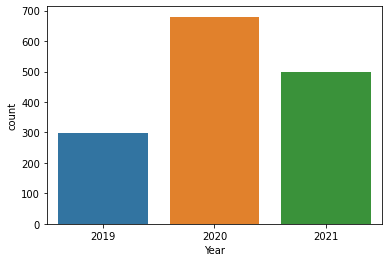

In [ ]:
sns.countplot(data= df_train1, x= "Year")

In [ ]:
# df_train2= df_train1.sort_values("target")
df_train3[-5:]

,league_name,id
55,3. Liga,1327
606,Super League,1530
512,Primera Division,2369
166,Club Friendlies,3724
489,Premier League,5565


In [ ]:
train_target[['home_goals','away_goals']]= train_target['score'].str.split('-', expand = True).astype(int)


In [ ]:
df_train

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10,Year
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0,2019
1,11984383,home,Real EstelÃ­,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,2019
2,11983301,draw,UPNFM,MarathÃ³n,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,2019
3,11983471,away,LeÃ³n,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0,2019
4,11883005,home,CobÃ¡n Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,draw,Zamora FÃºtbol Club,Hermanos Colmenares,2021-04-30 23:00:00,Primera Division,800,False,7708122.0,37564088.0,...,800.0,1101.0,1101.0,803.0,803.0,803.0,803.0,803.0,803.0,2021
110934,18030096,away,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,Liga De Futbol Prof,1098,False,465833.0,16488543.0,...,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,2021
110935,17715497,draw,SÃ£o Bernardo,Ãgua Santa,2021-04-30 23:00:00,Paulista A2,1314,False,8416491.0,528562.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0,2021
110936,17944153,away,Everton,La Serena,2021-05-01 00:00:00,Primera Division,663,False,6973085.0,471757.0,...,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,2021


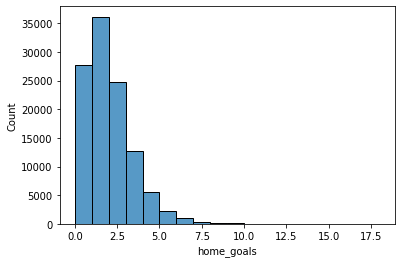

In [ ]:
sns.histplot(data=train_target, x= 'home_goals', binwidth = 1 )

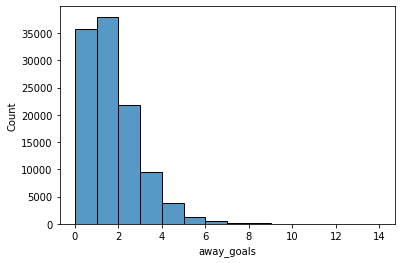

In [ ]:
sns.histplot(data=train_target, x= 'away_goals', binwidth = 1)

In [ ]:
sns.jointplot(data= train_target, x= 'home_goals', y='away_goals', kind = 'hist')

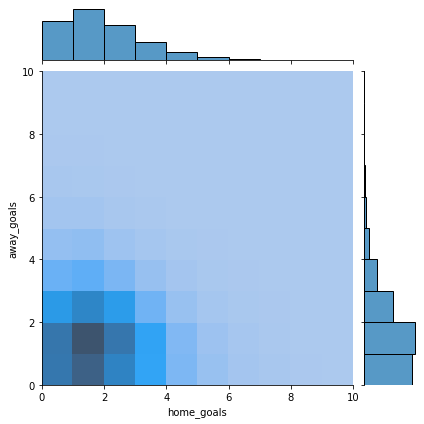

In [ ]:
sns.jointplot(data= train_target, x= 'home_goals', y='away_goals', kind = 'hist', binwidth= (1,1),xlim= (0,10), ylim=(0,10), thresh= None)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

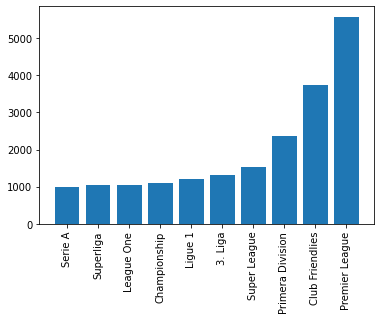

In [ ]:
plt.bar(df_train3[-10:]["league_name"],df_train3[-10:]["id"])
plt.xticks(rotation=90)

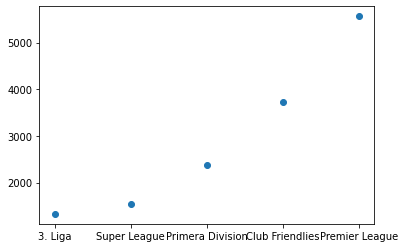

In [ ]:
plt.scatter(df_train3[-5:]["league_name"],df_train3[-5:]["id"])

In [ ]:
df_train.groupby('league_name').count()

,id,target,home_team_name,away_team_name,match_date,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10,Year
league_name,,,,,,,,,,,,,,,,,,,,,
1. Deild,89,89,89,89,89,89,89,27,33,88,...,85,84,80,76,71,66,62,54,50,89
1. Deild Women,68,68,68,68,68,68,68,45,46,65,...,63,62,60,58,56,53,51,49,47,68
1. Division,316,316,316,316,316,316,316,315,316,316,...,316,316,316,316,316,316,316,316,316,316
1. Division Women,26,26,26,26,26,26,26,5,5,22,...,17,14,7,3,2,0,0,0,0,26
1. HNL,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wsl 2 Women,117,117,117,117,117,117,117,117,117,117,...,117,117,117,117,117,116,116,116,113,117
Ybc Levain Cup,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
Ykkonen,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132


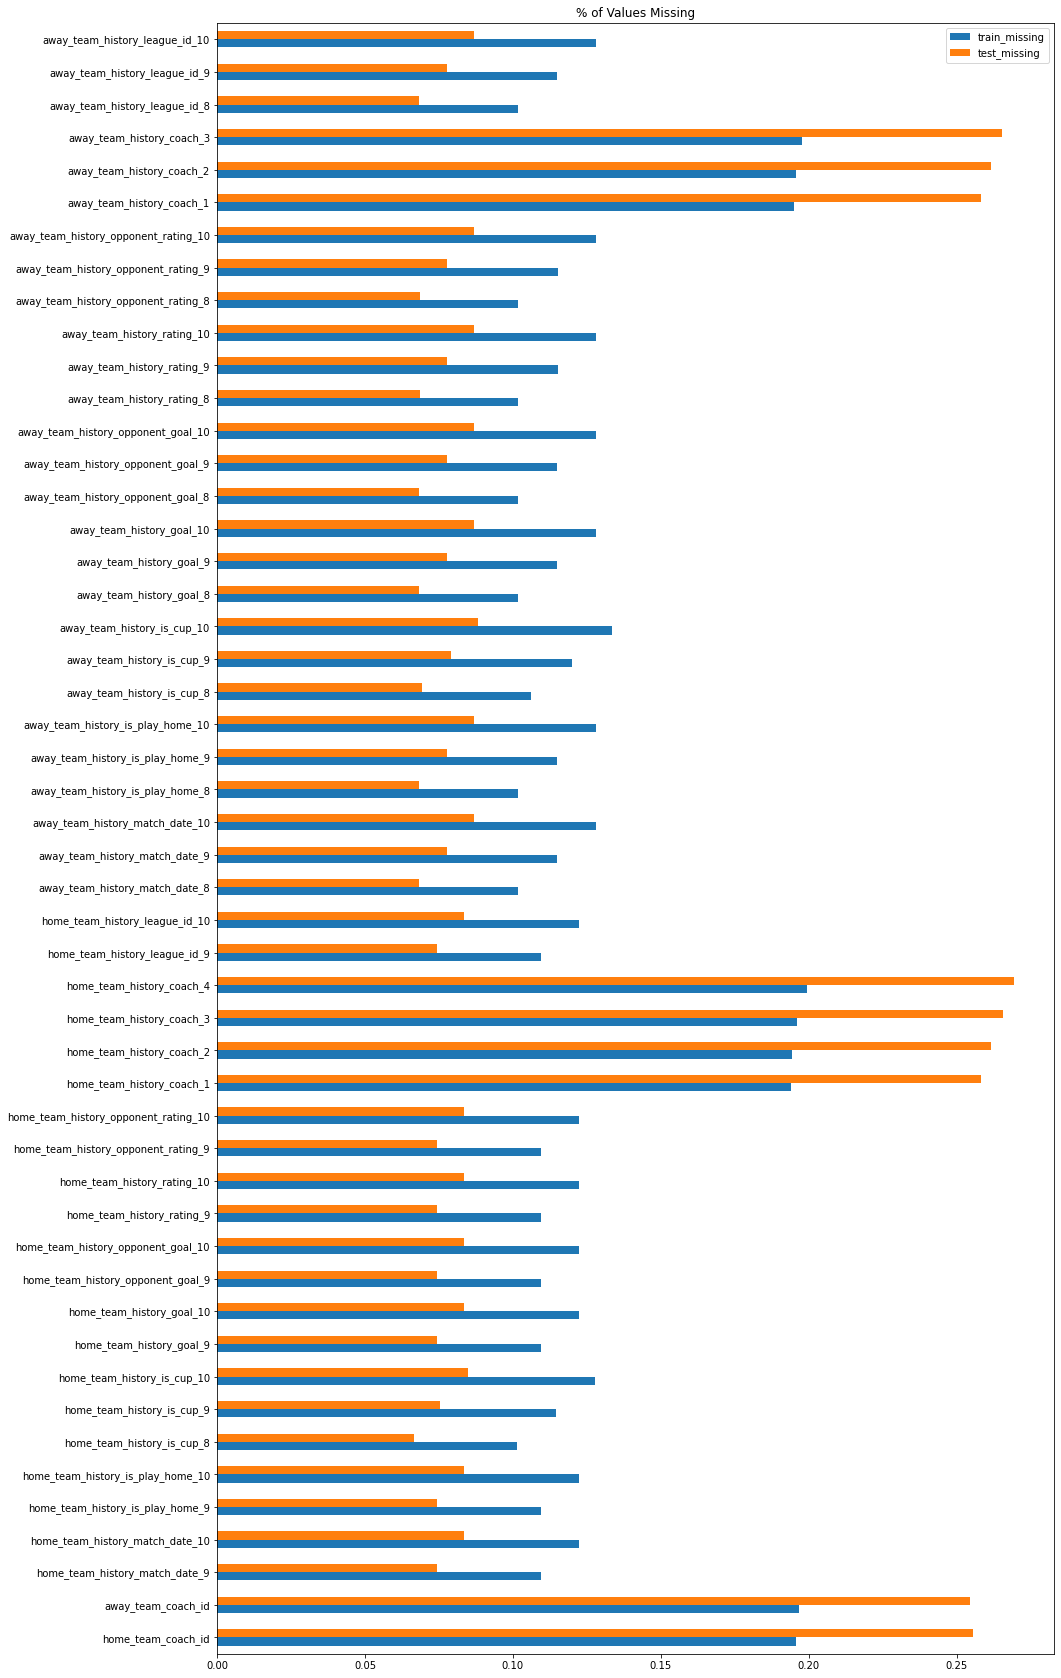

In [ ]:
count_missing = pd.DataFrame([df_train.isna().mean(),df_test.isna().mean()]).T
count_missing = count_missing.rename(columns={0: "train_missing", 1: "test_missing"})

count_missing.query("train_missing > 0.1 and train_missing < 0.2").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")

In [ ]:
count_missing

,train_missing,test_missing
id,0.000000,0.000000
target,0.000000,NaN
home_team_name,0.000009,0.000000
away_team_name,0.000009,0.000000
match_date,0.000000,0.000000
...,...,...
away_team_history_league_id_7,0.088942,0.059537
away_team_history_league_id_8,0.101814,0.068270
away_team_history_league_id_9,0.115037,0.077650
away_team_history_league_id_10,0.128144,0.086754


In [ ]:
train_target


,id,score,target
0,11906497,2-3,away
1,11984383,1-0,home
2,11983301,2-2,draw
3,11983471,1-2,away
4,11883005,1-0,home
...,...,...,...
110933,18030016,2-2,draw
110934,18030096,0-3,away
110935,17715497,1-1,draw
110936,17944153,0-4,away


In [ ]:
df_train["home_team_name"].value_counts()

Al Ittihad               51
Al Ahli                  43
Liverpool                40
River Plate              38
Rangers                  38
                         ..
Bedford Town              1
Rudar Mursko Sredisce     1
Cres                      1
Atlètic Amèrica           1
Hang Sai                  1
Name: home_team_name, Length: 9003, dtype: int64

In [ ]:
df_train = pd.merge(df_train, train_target,  on= "id")


In [ ]:
# number of goal for each league
temp =df_train["score"][1]
temp.split()

['1-0']

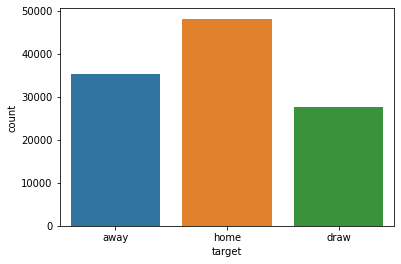

In [ ]:
sns.countplot(x="target", data=train_target)

4,5 ta az har league
groupby league

countplot

sort

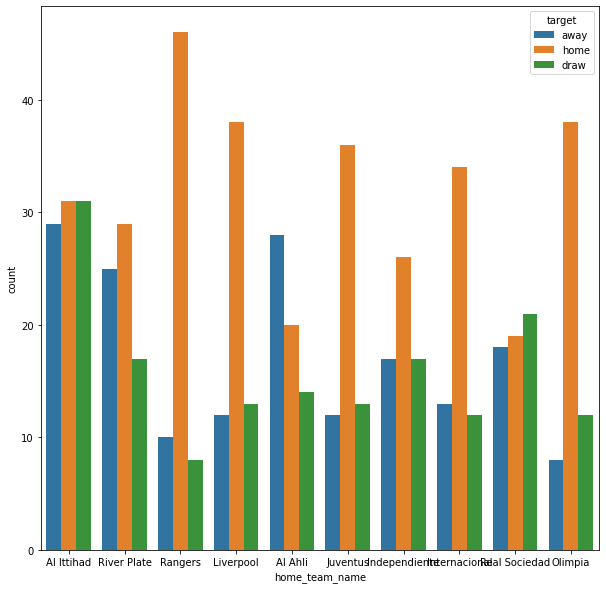

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="home_team_name", hue="target", data=df_train, order=df_train.home_team_name.value_counts().iloc[:10].index)

[Text(0, 0.5, 'Match count'),
 Text(0.5, 0, 'Is cup?'),
 Text(0.5, 1.0, 'Matches that are cup')]

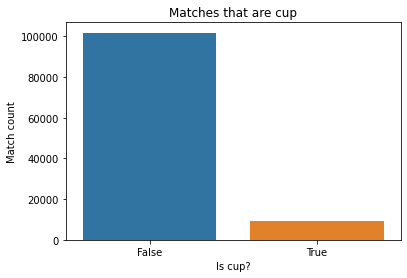

In [ ]:
sns.countplot(x='is_cup',data=df_train).set(title="Matches that are cup",ylabel='Match count',xlabel='Is cup?')

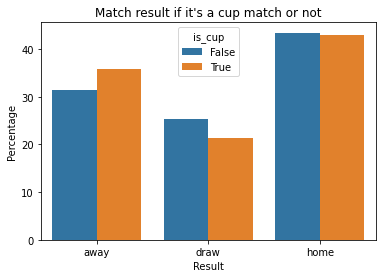

In [ ]:
impact_cup = df_train.groupby(['is_cup'])['target'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('target')
ax = sns.barplot(x='target',y='percentage',hue='is_cup',data=impact_cup).set(title="Match result if it's a cup match or not",ylabel='Percentage',xlabel='Result')
plt.show()

In [ ]:
df_train["home_team_history_rating_10"].describe()

count    97372.000000
mean         6.544828
std          2.671623
min          0.241800
25%          4.840749
50%          5.948483
75%          7.521593
max         53.630950
Name: home_team_history_rating_10, dtype: float64

In [ ]:
grouped_wins = df_train.groupby(['league_name'])['target'== 'home'].value_counts().reset_index()

# sort_values()





KeyError: ignored

#KNN

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train2 = df_train.fillna(0)
# X_test = X_test.fillna(0)



In [ ]:
df_test2 = df_test.fillna(0)

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(df_train.target)

In [ ]:
le = LabelEncoder()
y_test = le.fit_transform(df_test.target)

AttributeError: ignored

In [ ]:
X_train = df_train2["home_team_history_rating_10"].values



## KNN n_neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN1 = KNeighborsClassifier(n_neighbors=40)
modelKNN1.fit(X_train.reshape(-1,1),y_train)



KNeighborsClassifier(n_neighbors=40)

In [ ]:
X_test =df_test2["home_team_history_rating_10"].values

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
y_predKN1 = modelKNN1.predict(X_train.reshape(-1, 1))
print( classification_report(y_train,y_predKN1))
Y_KN1 = accuracy_score(y_train,y_predKN1)


              precision    recall  f1-score   support

           0       0.41      0.23      0.30     35174
           1       0.40      0.10      0.16     27651
           2       0.47      0.81      0.59     48113

    accuracy                           0.45    110938
   macro avg       0.42      0.38      0.35    110938
weighted avg       0.43      0.45      0.39    110938

